In [28]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
import matplotlib.pyplot as plt
from community import community_louvain
import csv
%matplotlib inline
!ls

 community-detection.ipynb  'Domestic Terror Web Network.ipynb'
 CSV			     ternet.csv


In [29]:
edge_data  = []
with open('CSV/fifa1.csv') as datafile:
    data = csv.reader(datafile, delimiter=',')
    header = next(data)
    for row in data:
        for i,x in enumerate(row):
            if x=='1':
                edge_data.append(row[0]+" "+header[i])

In [30]:
G = nx.parse_edgelist(edge_data, nodetype = str)
pos = nx.spring_layout(G)

TypeError: Failed to convert edge data (['Mohamed', 'Abbas', 'Moulay', 'Mohamed']) to dictionary.

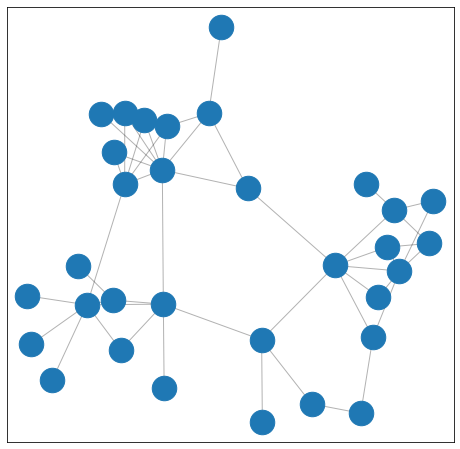

In [23]:
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

In [19]:
print(len(G.nodes))
print(len(G.edges))

32
50


# K-Clique

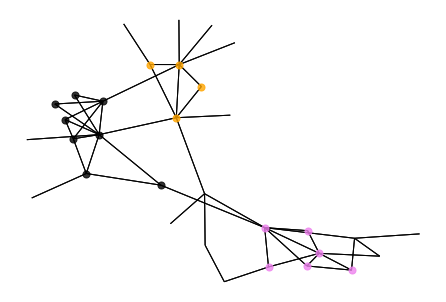

In [7]:
communities = list(k_clique_communities(G, 3))
colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(G, pos, nodelist=node_list, node_color=colors[i%10], node_size=50, alpha=0.8)

# Girwan newman

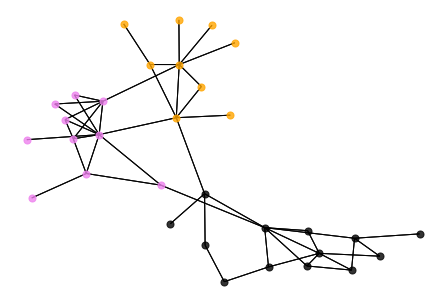

In [8]:
communities_generator = girvan_newman(G)
colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
next(communities_generator)
communit = next(communities_generator)
for i in range(len(communit)):
    graph = communit[i]
    node_list = [node for node in graph]
    nx.draw(G, pos, nodelist=node_list, node_color=colors[i%10], node_size=50, alpha=0.8)

# Louvain

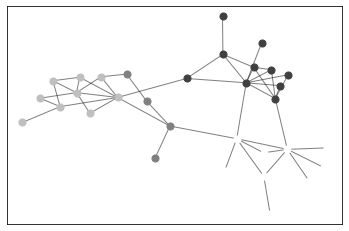

In [32]:
partition = community_louvain.best_partition(G)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()):
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50,node_color = str(count / size)) 
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
label_propagation_communities(G)